Скачиваю все аминокислоты с PubChem, подаю на вход RDkit и визуализирую фармакофоры

In [1]:
import pubchempy as pcp


amino_acids = ['Alanine', 'Arginine', 'Asparagine', 'Aspartic acid', 'Cysteine', 'Glutamic acid', 'Glutamine', 'Glycine', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanine', 'Proline', 'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valine']

for aa in amino_acids:
    try:
        pcp.download('SDF', f'AminoAcids/{aa}.sdf', aa, namespace='name', record_type='3d', overwrite=True)
        print(f"{aa} скачан.")
    except Exception as e:
        print(f"Ошибка при скачивании {aa}: {e}")

Alanine скачан.
Arginine скачан.
Asparagine скачан.
Aspartic acid скачан.
Cysteine скачан.
Glutamic acid скачан.
Glutamine скачан.
Glycine скачан.
Histidine скачан.
Isoleucine скачан.
Leucine скачан.
Lysine скачан.
Methionine скачан.
Phenylalanine скачан.
Proline скачан.
Serine скачан.
Threonine скачан.
Tryptophan скачан.
Tyrosine скачан.
Valine скачан.


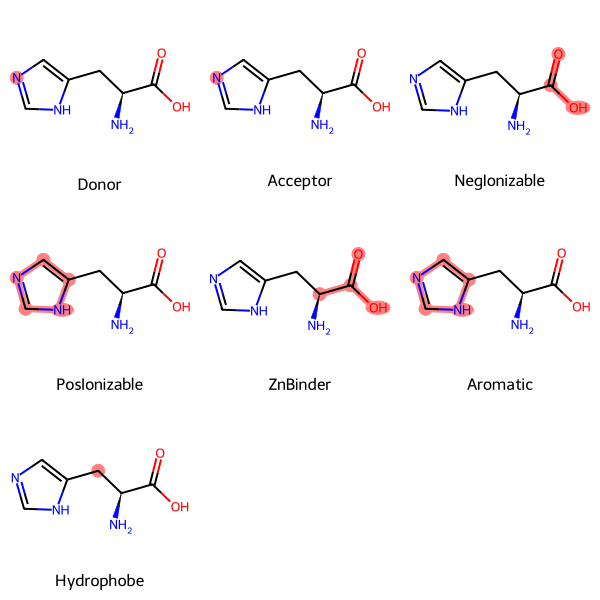

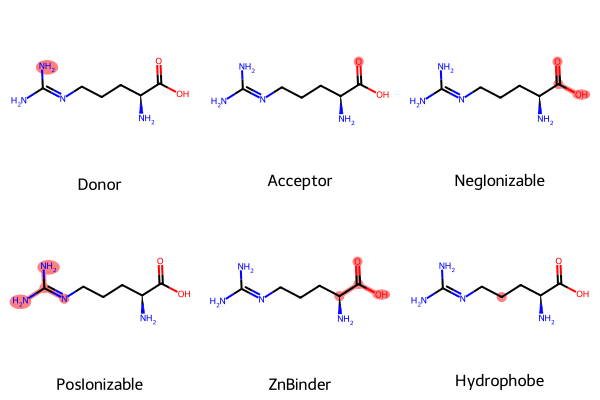

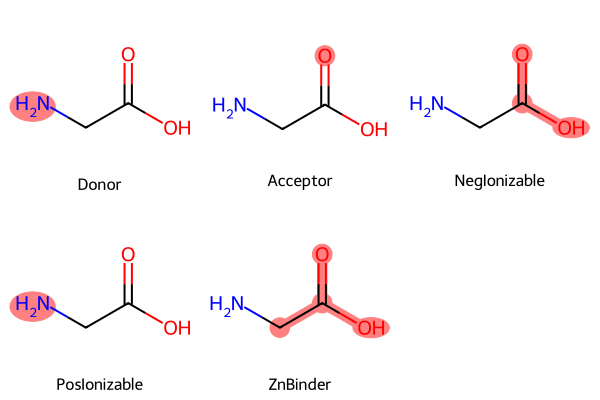

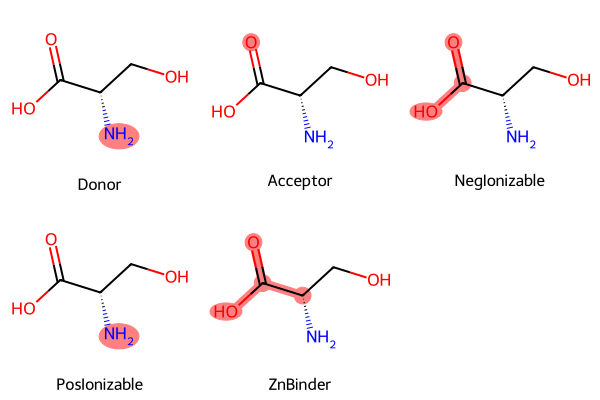

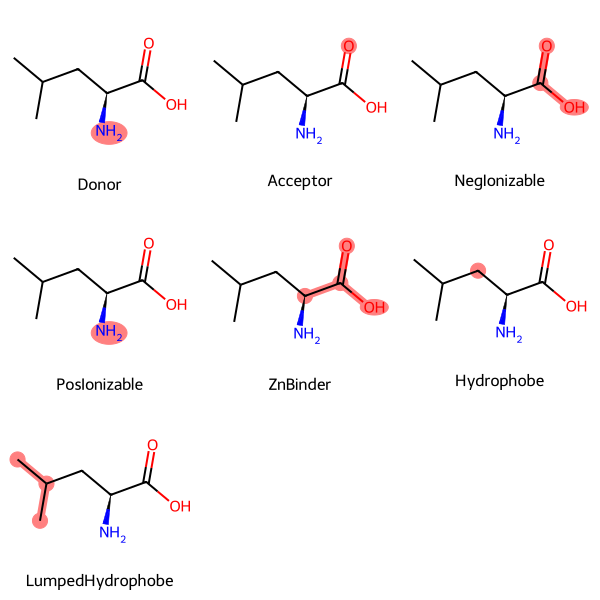

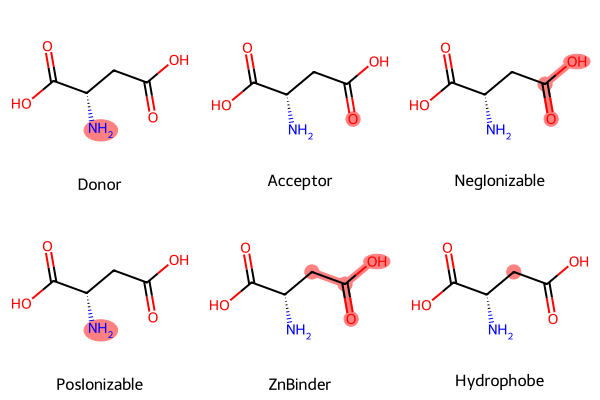

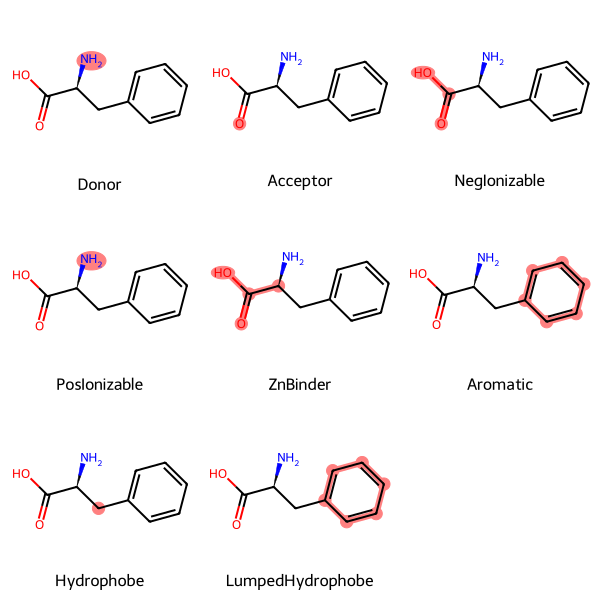

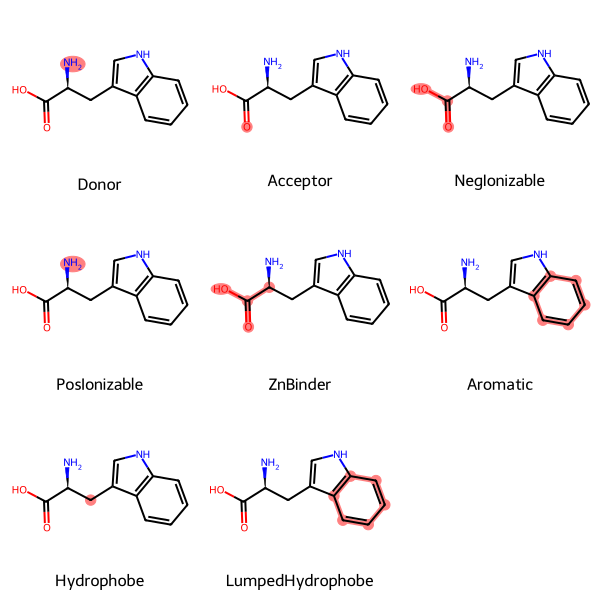

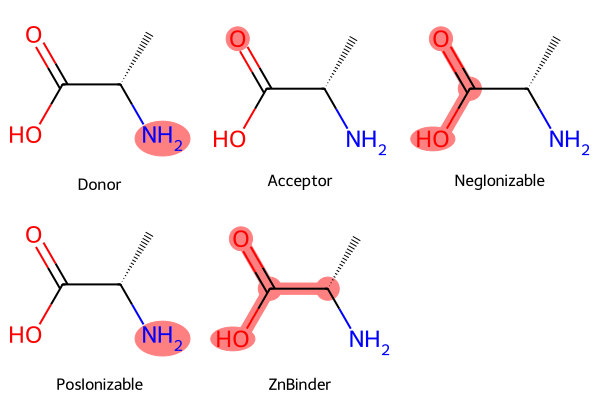

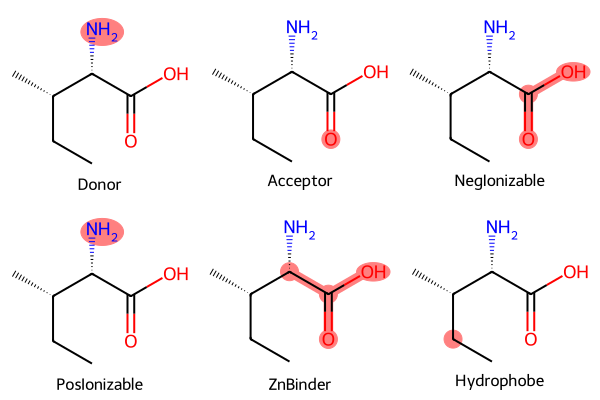

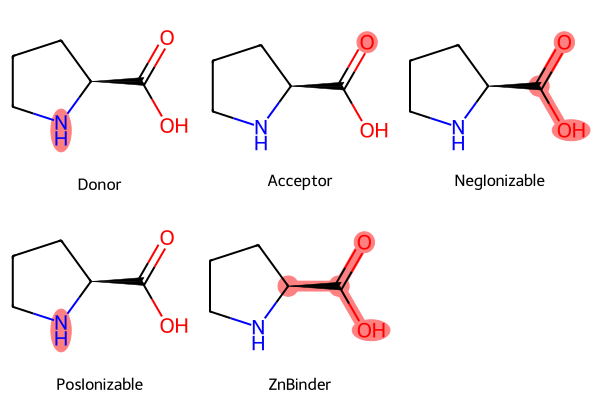

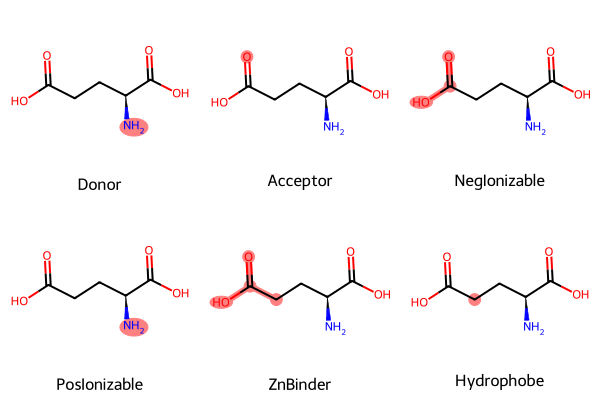

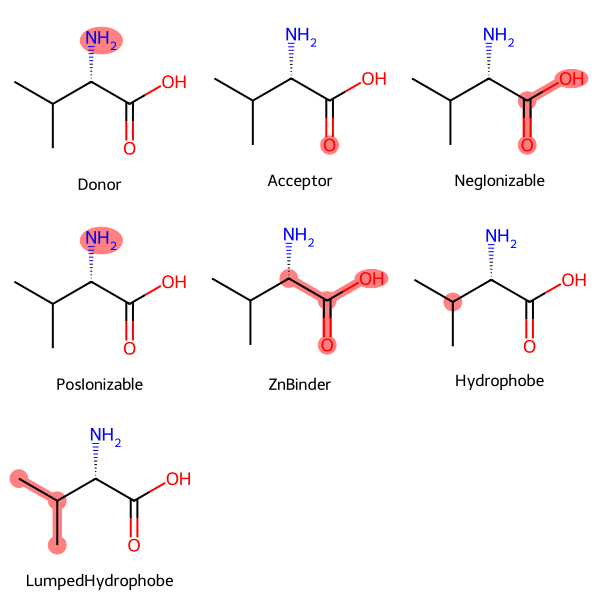

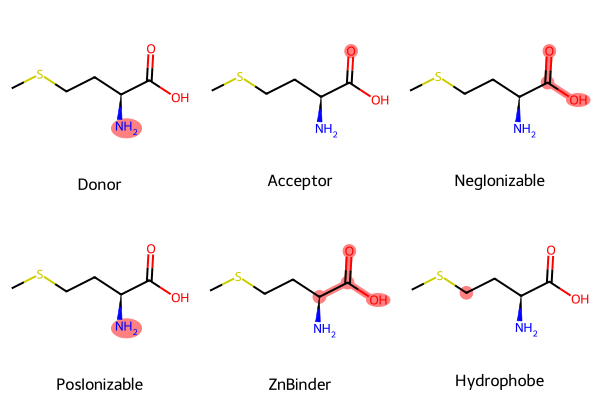

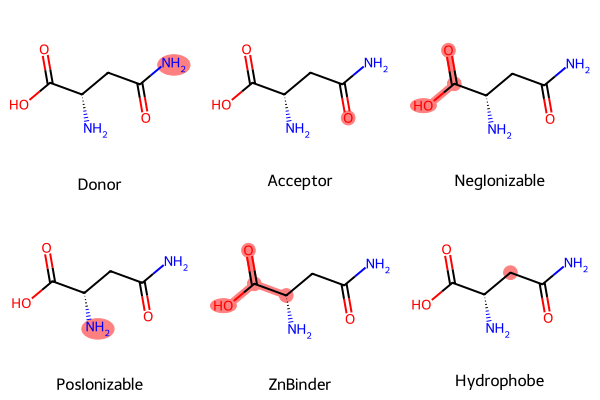

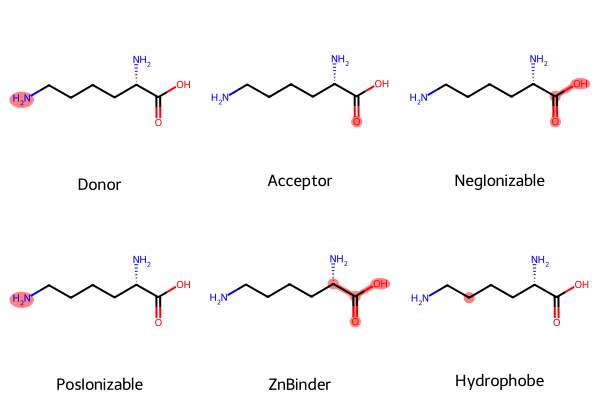

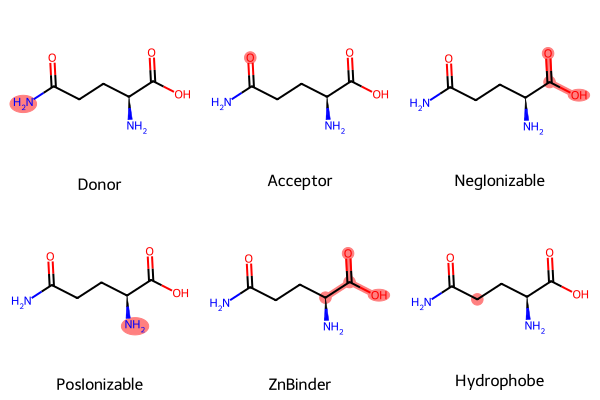

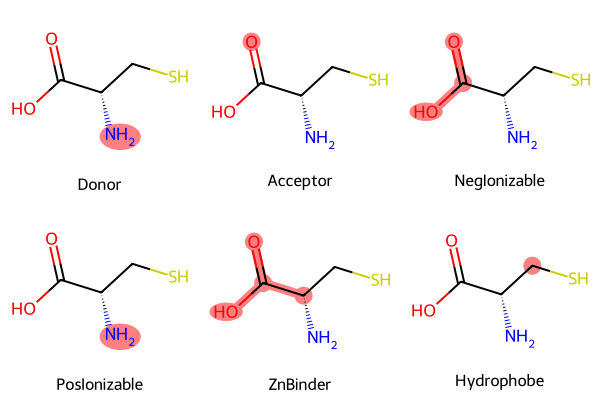

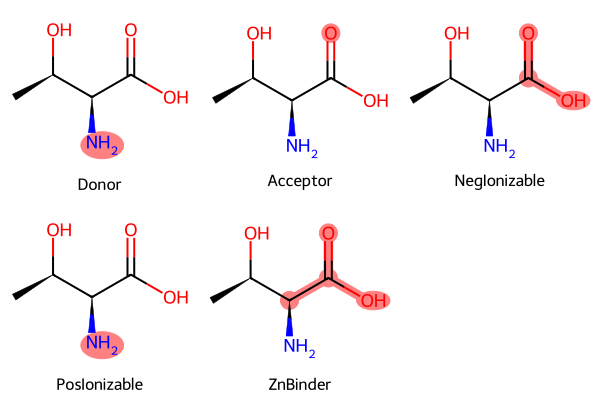

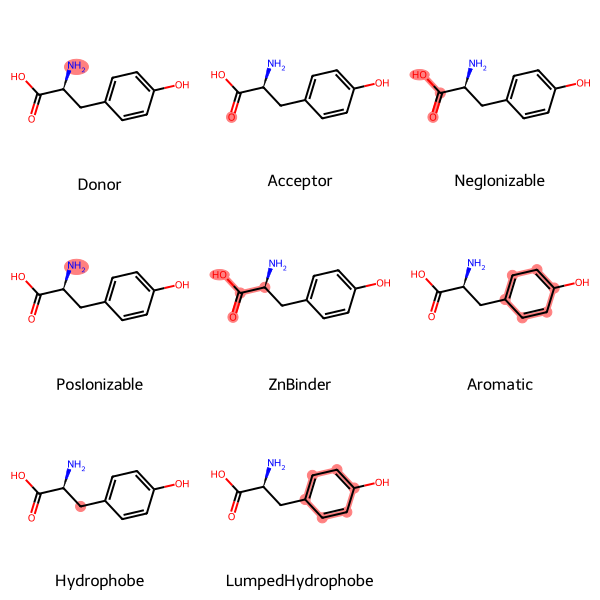

In [2]:
from IPython.display import display
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import ChemicalFeatures
from rdkit.RDPaths import RDDataDir
import os


fdefFile = os.path.join(RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefFile)


mols = []
featslist = []
for aa in os.listdir('./AminoAcids'):
    aa_path = f'./AminoAcids/{aa}'
    mol = next(Chem.SDMolSupplier(aa_path))
    mols.append(mol)
    featslist.append(factory.GetFeaturesForMol(mol))
    AllChem.Compute2DCoords(mol)

def drawp4core(mol, feats):
    atoms_list = {}
    for feat in feats:
        atom_ids = feat.GetAtomIds()
        feat_type = feat.GetFamily()
        atoms_list[feat_type] = atom_ids
    return Draw.MolsToGridImage([mol]*len(atoms_list), legends=list(atoms_list.keys()), highlightAtomLists=list(atoms_list.values()))

for mol, feats in zip(mols, featslist):
    im = drawp4core(mol, feats)
    display(im)

Создаю словарь для аминокислот. Заполняю, ориентируясь на разметку по фармакофорам из RDkit

In [3]:
AA = {
    'A': {},
    'C': {},
    'D': {},
    'E': {},
    'F': {},
    'G': {},
    'H': {},
    'I': {},
    'K': {},
    'L': {},
    'M': {},
    'N': {},
    'P': {},
    'Q': {},
    'R': {},
    'S': {},
    'T': {},
    'V': {},
    'W': {},
    'Y': {}
}

AA_atom_pharm_dict = {
    'A': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd'
          },

    'C': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'SG': 'Sul'
          },

    'D': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': 'Neu',
          'OD1': ('Acc', 'Neg'), 'OD2': ('Acc', 'Neg')
          },

    'E': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': 'Hyd', 'CD': 'Neu',
          'OE1': ('Acc', 'Neg'), 'OE2': ('Acc', 'Neg')
          },

    'F': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': ('Aro', 'Hyd'),
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'),
          'CE1': ('Aro', 'Hyd'), 'CE2': ('Aro', 'Hyd'),
          'CZ': ('Aro', 'Hyd')
          },

    'G': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc'
          },

    'H': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd', 
          'ND1': ('Aro', 'Don'), 'NE2': ('Aro', 'Don'),
          'CG': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'), 'CE1': ('Aro', 'Hyd')
          },

    'I': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG1': 'Hyd', 'CG2': 'Hyd', 'CD1': 'Hyd'
          },

    'K': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': 'Hyd', 'CD': 'Hyd', 'CE': 'Hyd',
          'NZ': ('Don', 'Pos')
          },

    'L': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': 'Hyd', 'CD1': 'Hyd', 'CD2': 'Hyd'
          },

    'M': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': 'Hyd', 'CE': 'Hyd',
          'SD': 'Sul'
          },

    'N': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': 'Neu',
          'OD1': 'Acc',
          'ND2': 'Don'
          },

    'P': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CD': 'Hyd', 'CG': 'Hyd'
          },

    'Q': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': 'Hyd', 'CD': 'Neu',
          'OE': 'Acc', 
          'NE2': 'Don'
          },

    'R': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd', 
          'CG': 'Hyd', 'CD': 'Hyd', 'NE': 'Don', 'CZ': 'Neu', 
          'NH1': ('Don', 'Pos'), 'NH2': ('Don', 'Pos')
          },

    'S': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'OG': ('Acc', 'Don')
          },

    'T': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG2': 'Neu',
          'OG1': ('Acc', 'Don')
          },

    'V': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG1': 'Hyd', 'CG2': 'Hyd'
          },

    'W': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': ('Aro', 'Hyd'), 
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'), 
          'CE2': ('Aro', 'Hyd'), 'CE3': ('Aro', 'Hyd'),
          'CZ2': ('Aro', 'Hyd'), 'CZ3': ('Aro', 'Hyd'),
          'CH2': ('Aro', 'Hyd'),
          'NE1': 'Don'
          },

    'Y': {'N': 'Don', 'CA': 'Neu', 'C': 'Neu', 'O': 'Acc', 'CB': 'Hyd',
          'CG': ('Aro', 'Hyd'),
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'),
          'CE1': ('Aro', 'Hyd'), 'CE2': ('Aro', 'Hyd'),
          'CZ': ('Aro', 'Hyd'),
          'OH': ('Acc', 'Don')
          },
          
}

В финальном варианте словаря все значения сделаю в виде tuple

In [14]:
AA_atom_pharm_dict = {
    'A': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',)},

    'C': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'SG': ('Sul',)
          },

    'D': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Neu',),
          'OD1': ('Acc', 'Neg'), 'OD2': ('Acc', 'Neg')
          },

    'E': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CD': ('Neu',),
          'OE1': ('Acc', 'Neg'), 'OE2': ('Acc', 'Neg')
          },

    'F': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Aro', 'Hyd'),
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'),
          'CE1': ('Aro', 'Hyd'), 'CE2': ('Aro', 'Hyd'),
          'CZ': ('Aro', 'Hyd')
          },

    'G': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',)},

    'H': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',), 
          'ND1': ('Aro', 'Don'), 'NE2': ('Aro', 'Don'),
          'CG': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'), 'CE1': ('Aro', 'Hyd')
          },

    'I': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG1': ('Hyd',), 'CG2': ('Hyd',), 'CD1': ('Hyd',)
          },

    'K': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CD': ('Hyd',), 'CE': ('Hyd',),
          'NZ': ('Don', 'Pos')
          },

    'L': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CD1': ('Hyd',), 'CD2': ('Hyd',)
          },

    'M': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CE': ('Hyd',),
          'SD': ('Sul',)
          },

    'N': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Neu',),
          'OD1': ('Acc',),
          'ND2': ('Don',)
          },

    'P': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CD': ('Hyd',), 'CG': ('Hyd',)
          },

    'Q': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CD': ('Neu',),
          'OE1': ('Acc',), 
          'NE2': ('Don',)
          },

    'R': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',), 
          'CG': ('Hyd',), 'CD': ('Hyd',), 'NE': ('Don',), 'CZ': ('Neu',), 
          'NH1': ('Don', 'Pos'), 'NH2': ('Don', 'Pos')
          },

    'S': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'OG': ('Acc', 'Don')
          },

    'T': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG2': ('Neu',),
          'OG1': ('Acc', 'Don')
          },

    'V': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG1': ('Hyd',), 'CG2': ('Hyd',)
          },

    'W': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Aro', 'Hyd'), 
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'), 
          'CE2': ('Aro', 'Hyd'), 'CE3': ('Aro', 'Hyd'),
          'CZ2': ('Aro', 'Hyd'), 'CZ3': ('Aro', 'Hyd'),
          'CH2': ('Aro', 'Hyd'),
          'NE1': ('Don', 'Aro', 'Hyd')
          },

    'Y': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Aro', 'Hyd'),
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'),
          'CE1': ('Aro', 'Hyd'), 'CE2': ('Aro', 'Hyd'),
          'CZ': ('Aro', 'Hyd'),
          'OH': ('Acc', 'Don')
          },
}


Теперь по словарю с фармакофорами для каждого атома делаю словарь векторов фармакофоров

In [15]:
import numpy as np

AtomClass = ('Hyd', 'Pos', 'Neg', 'Acc', 'Don', 'Aro', 'Sul', 'Neu')


def count_atoms(amino_acid_dict):
    """
    Подсчитывает количество атомов каждого типа в словаре аминокислоты.
    """
    counts = [0] * len(AtomClass)
    for atom_type in amino_acid_dict.values():
        for atom in atom_type:
            if atom in AtomClass:
                counts[AtomClass.index(atom)] += 1
    return np.array(counts)

AA_vector_pharm_dict = {amino_acid: count_atoms(amino_acid_dict) for amino_acid, amino_acid_dict in AA_atom_pharm_dict.items()}

AA_vector_pharm_dict

{'A': array([1, 0, 0, 1, 1, 0, 0, 2]),
 'C': array([1, 0, 0, 1, 1, 0, 1, 2]),
 'D': array([1, 0, 2, 3, 1, 0, 0, 3]),
 'E': array([2, 0, 2, 3, 1, 0, 0, 3]),
 'F': array([7, 0, 0, 1, 1, 6, 0, 2]),
 'G': array([0, 0, 0, 1, 1, 0, 0, 2]),
 'H': array([4, 0, 0, 1, 3, 5, 0, 2]),
 'I': array([4, 0, 0, 1, 1, 0, 0, 2]),
 'K': array([4, 1, 0, 1, 2, 0, 0, 2]),
 'L': array([4, 0, 0, 1, 1, 0, 0, 2]),
 'M': array([3, 0, 0, 1, 1, 0, 1, 2]),
 'N': array([1, 0, 0, 2, 2, 0, 0, 3]),
 'P': array([3, 0, 0, 1, 1, 0, 0, 2]),
 'Q': array([2, 0, 0, 2, 2, 0, 0, 3]),
 'R': array([3, 2, 0, 1, 4, 0, 0, 3]),
 'S': array([1, 0, 0, 2, 2, 0, 0, 2]),
 'T': array([1, 0, 0, 2, 2, 0, 0, 3]),
 'V': array([3, 0, 0, 1, 1, 0, 0, 2]),
 'W': array([10,  0,  0,  1,  2,  9,  0,  2]),
 'Y': array([7, 0, 0, 2, 2, 6, 0, 2])}

Переназвал аминокислоты трехбуквенными названиями, так в csm.ipynb не надо будет переводить перед поиском в этом словаре

In [ ]:
AA_atom_pharm_dict = {
    'ALA': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',)},

    'CYS': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'SG': ('Sul',)
          },

    'ASP': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Neu',),
          'OD1': ('Acc', 'Neg'), 'OD2': ('Acc', 'Neg')
          },

    'GLU': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CD': ('Neu',),
          'OE1': ('Acc', 'Neg'), 'OE2': ('Acc', 'Neg')
          },

    'PHE': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Aro', 'Hyd'),
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'),
          'CE1': ('Aro', 'Hyd'), 'CE2': ('Aro', 'Hyd'),
          'CZ': ('Aro', 'Hyd')
          },

    'GLY': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',)},

    'HIS': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',), 
          'ND1': ('Aro', 'Don'), 'NE2': ('Aro', 'Don'),
          'CG': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'), 'CE1': ('Aro', 'Hyd')
          },

    'ILE': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG1': ('Hyd',), 'CG2': ('Hyd',), 'CD1': ('Hyd',)
          },

    'LYS': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CD': ('Hyd',), 'CE': ('Hyd',),
          'NZ': ('Don', 'Pos')
          },

    'LEU': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CD1': ('Hyd',), 'CD2': ('Hyd',)
          },

    'MET': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CE': ('Hyd',),
          'SD': ('Sul',)
          },

    'ASN': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Neu',),
          'OD1': ('Acc',),
          'ND2': ('Don',)
          },

    'PRO': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CD': ('Hyd',), 'CG': ('Hyd',)
          },

    'GLN': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Hyd',), 'CD': ('Neu',),
          'OE1': ('Acc',), 
          'NE2': ('Don',)
          },

    'ARG': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',), 
          'CG': ('Hyd',), 'CD': ('Hyd',), 'NE': ('Don',), 'CZ': ('Neu',), 
          'NH1': ('Don', 'Pos'), 'NH2': ('Don', 'Pos')
          },

    'SER': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'OG': ('Acc', 'Don')
          },

    'THR': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG2': ('Neu',),
          'OG1': ('Acc', 'Don')
          },

    'VAL': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG1': ('Hyd',), 'CG2': ('Hyd',)
          },

    'TRP': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Aro', 'Hyd'), 
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'), 
          'CE2': ('Aro', 'Hyd'), 'CE3': ('Aro', 'Hyd'),
          'CZ2': ('Aro', 'Hyd'), 'CZ3': ('Aro', 'Hyd'),
          'CH2': ('Aro', 'Hyd'),
          'NE1': ('Don', 'Aro', 'Hyd')
          },

    'TYR': {'N': ('Don',), 'CA': ('Neu',), 'C': ('Neu',), 'O': ('Acc',), 'CB': ('Hyd',),
          'CG': ('Aro', 'Hyd'),
          'CD1': ('Aro', 'Hyd'), 'CD2': ('Aro', 'Hyd'),
          'CE1': ('Aro', 'Hyd'), 'CE2': ('Aro', 'Hyd'),
          'CZ': ('Aro', 'Hyd'),
          'OH': ('Acc', 'Don')
          },
}